In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [6]:
# !pip install kmodes

In [2]:
sms_data = pd.read_csv('SMS campaing.csv')

In [3]:
sms_data.head()

,Event Type,Event Venue,Event Genre,Preferred Day,Preferred Time,Age
0,Indoor,Jaffna,Theater,Tuesday,Evening,47
1,Outdoor,Kandy,Music,Sunday,Morning,49
2,Outdoor,Matara,Theater,Sunday,Night,35
3,Outdoor,Hambantota,Comedy,Wednesday,Night,52
4,Outdoor,Kandy,Comedy,Monday,Night,60


In [4]:
sms_data.shape

(1000, 6)

In [5]:
sms_data.isnull().sum()

Event Type        0
Event Venue       0
Event Genre       0
Preferred Day     0
Preferred Time    0
Age               0
dtype: int64

In [6]:
sms_data.dtypes

Event Type        object
Event Venue       object
Event Genre       object
Preferred Day     object
Preferred Time    object
Age                int64
dtype: object

In [7]:
sms_data.columns

Index(['Event Type', 'Event Venue', 'Event Genre', 'Preferred Day',
       'Preferred Time', 'Age'],
      dtype='object')

In [8]:
for column in sms_data.columns:
    unique_values = sms_data[column].unique()
    print(f"Unique values in '{column}': \033[1m{unique_values}\033[0m\n")

Unique values in 'Event Type': ['Indoor' 'Outdoor']

Unique values in 'Event Venue': ['Jaffna' 'Kandy' 'Matara' 'Hambantota' 'Kalutara' 'Galle' 'Kilinochchi'
 'Colombo' 'Mannar' 'Nuwara Eliya' 'Ratnapura' 'Matale' 'Gampaha'
 'Kegalle' 'Trincomalee' 'Ampara' 'Batticaloa']

Unique values in 'Event Genre': ['Theater' 'Music' 'Comedy' 'Festival']

Unique values in 'Preferred Day': ['Tuesday' 'Sunday' 'Wednesday' 'Monday' 'Thursday' 'Friday']

Unique values in 'Preferred Time': ['Evening' 'Morning' 'Night']

Unique values in 'Age': [47 49 35 52 60 21 57 29 54 33 36 22 59 38 34 27 41 31 37 55 28 58 32 42
 18 24 53 45 51 50 23 39 43 56 46 48 44 40 26 30 19 20 25]



In [9]:
# Define categorical features
categorical_features = ['Event Type', 'Event Venue', 'Event Genre', 'Preferred Day', 'Preferred Time']

In [10]:
# Define ColumnTransformer for one-hot encoding and scaling
categorical_transformer = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', MinMaxScaler(), ['Age'])
    ])

In [12]:
type(('cat', categorical_transformer, categorical_features))

tuple

In [13]:
# Apply transformation
X = preprocessor.fit_transform(sms_data)

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [14]:
len(X[0])

33

In [15]:
# Get indices of categorical columns (one-hot encoded columns)
cat_features = preprocessor.named_transformers_['cat']
n_categorical_features = len(cat_features.get_feature_names_out())
categorical_columns = list(range(n_categorical_features))  # Indices for categorical features

In [16]:
# Split data into train and test
df_train, df_test = train_test_split(X, test_size=0.3, random_state=42)

In [17]:
for k in range(10):
    print(k)

0
1
2
3
4
5
6
7
8
9


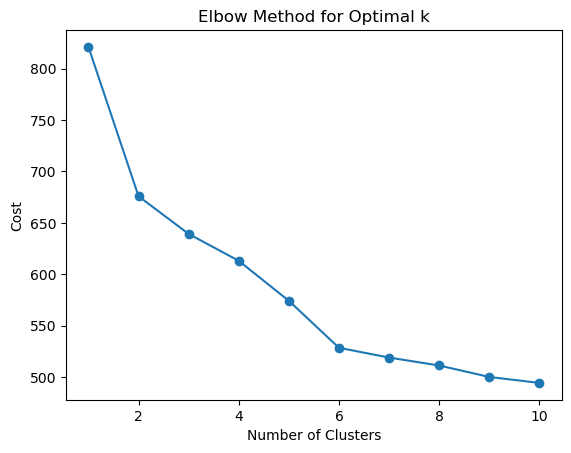

In [18]:
# Elbow method to find optimal clusters
costs = []
for k in range(1, 11):
    kproto = KPrototypes(n_clusters=k, init='Cao', n_init=10, verbose=0)
    kproto.fit(X, categorical=categorical_columns)
    costs.append(kproto.cost_)

# Plot elbow curve
plt.plot(range(1, 11), costs, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.title('Elbow Method for Optimal k')
plt.show()

In [19]:
# Fit K-Prototypes with optimal number of clusters (e.g., 2 clusters)
kproto = KPrototypes(n_clusters=2, init='Cao', n_init=10, verbose=2)
clusters_train = kproto.fit_predict(df_train, categorical=categorical_columns)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 149, ncost: 478.0433120660702
Run: 1, iteration: 2/100, moves: 0, ncost: 478.0433120660702
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 211, ncost: 478.0621988078
Run: 2, iteration: 2/100, moves: 4, ncost: 478.0433120660702
Run: 2, iteration: 3/100, moves: 0, ncost: 478.0433120660702
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 3, iteration: 1/100, moves: 146, ncost: 478.0433120660702
Run: 3, iteration: 2/100, moves: 0, ncost: 478.0433120660702
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 4, iteration: 1/100, moves: 141, ncost: 478.04331206607026
Run: 4, iteration: 2/100, moves: 0, ncost: 478.04331206607026
Init: initializing centroids
Init: initializing 

In [20]:
# Reduce dimensionality for visualization using PCA
pca = PCA(n_components=2)
reduced_data_train = pca.fit_transform(df_train)

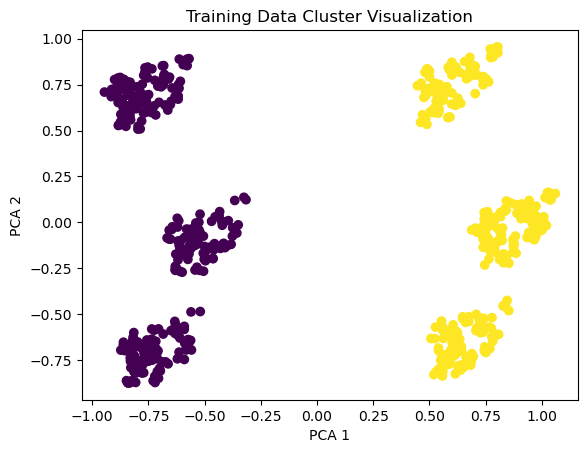

In [21]:
# Visualize clusters for training data
plt.scatter(reduced_data_train[:, 0], reduced_data_train[:, 1], c=clusters_train, cmap='viridis')
plt.title('Training Data Cluster Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [22]:
# Predict clusters for the test data
clusters_test = kproto.predict(df_test, categorical=categorical_columns)

In [23]:
# Reduce dimensionality for test data visualization
reduced_data_test = pca.transform(df_test)

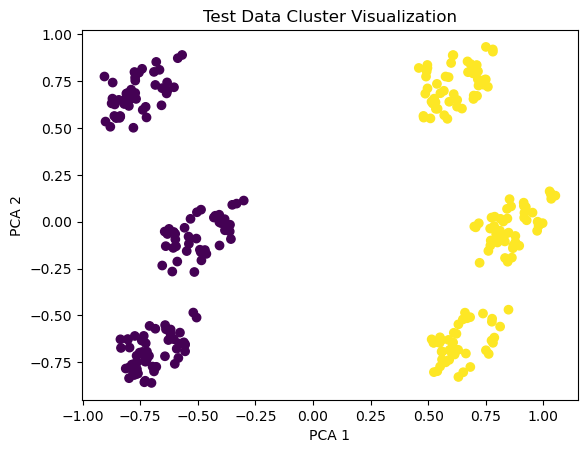

In [24]:
# Visualize clusters for test data
plt.scatter(reduced_data_test[:, 0], reduced_data_test[:, 1], c=clusters_test, cmap='viridis')
plt.title('Test Data Cluster Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [25]:
# Create DataFrame for train and test clusters
df_train_clustered = pd.DataFrame(df_train, columns=[f"Feature {i+1}" for i in range(df_train.shape[1])])
df_train_clustered['Cluster'] = clusters_train
print("\nTrain Set with Cluster Assignments:")
print(df_train_clustered)


Train Set with Cluster Assignments:
     Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0          1.0        0.0        0.0        0.0        0.0        0.0   
1          1.0        0.0        0.0        0.0        1.0        0.0   
2          1.0        0.0        0.0        0.0        0.0        0.0   
3          1.0        0.0        0.0        0.0        0.0        0.0   
4          0.0        1.0        0.0        0.0        0.0        0.0   
..         ...        ...        ...        ...        ...        ...   
695        1.0        0.0        0.0        0.0        1.0        0.0   
696        1.0        0.0        0.0        0.0        0.0        0.0   
697        0.0        1.0        0.0        0.0        0.0        0.0   
698        0.0        1.0        0.0        0.0        0.0        0.0   
699        0.0        1.0        0.0        0.0        0.0        0.0   

     Feature 7  Feature 8  Feature 9  Feature 10  ...  Feature 25  Feature 26  \
0    

In [26]:
df_test_clustered = pd.DataFrame(df_test, columns=[f"Feature {i+1}" for i in range(df_test.shape[1])])
df_test_clustered['Cluster'] = clusters_test
print("\nTest Set with Cluster Assignments:")
print(df_test_clustered)


Test Set with Cluster Assignments:
     Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  Feature 6  \
0          0.0        1.0        0.0        0.0        0.0        0.0   
1          1.0        0.0        0.0        0.0        0.0        0.0   
2          1.0        0.0        0.0        1.0        0.0        0.0   
3          1.0        0.0        0.0        0.0        0.0        1.0   
4          1.0        0.0        0.0        0.0        0.0        0.0   
..         ...        ...        ...        ...        ...        ...   
295        1.0        0.0        0.0        0.0        0.0        0.0   
296        1.0        0.0        0.0        0.0        0.0        0.0   
297        1.0        0.0        0.0        0.0        0.0        0.0   
298        1.0        0.0        0.0        0.0        0.0        1.0   
299        1.0        0.0        0.0        0.0        0.0        0.0   

     Feature 7  Feature 8  Feature 9  Feature 10  ...  Feature 25  Feature 26  \
0     

In [27]:
clusters = kproto.predict(X, categorical=categorical_columns)  # Use the same X used for fitting

In [28]:
clustered_data = pd.DataFrame(sms_data)  # Create a DataFrame from the original data
clustered_data['Cluster'] = clusters  # Add the cluster assignments

In [29]:
clustered_data

,Event Type,Event Venue,Event Genre,Preferred Day,Preferred Time,Age,Cluster
0,Indoor,Jaffna,Theater,Tuesday,Evening,47,0
1,Outdoor,Kandy,Music,Sunday,Morning,49,1
2,Outdoor,Matara,Theater,Sunday,Night,35,1
3,Outdoor,Hambantota,Comedy,Wednesday,Night,52,1
4,Outdoor,Kandy,Comedy,Monday,Night,60,1
...,...,...,...,...,...,...,...
995,Outdoor,Galle,Music,Monday,Night,49,1
996,Outdoor,Ampara,Music,Monday,Evening,24,1
997,Indoor,Mannar,Festival,Monday,Morning,48,0
998,Outdoor,Ratnapura,Theater,Wednesday,Morning,58,1


# testing

In [30]:
# Create a sample customer data DataFrame
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Hannah', 'Ian', 'Jack'],
    'PhoneNumber': ['+12345678901', '+12345678902', '+12345678903', '+12345678904', 
                    '+12345678905', '+12345678906', '+12345678907', '+12345678908', 
                    '+12345678909', '+12345678910'],
    'Cluster': [0, 1, 0, 1, 0, 0, 1, 0, 1, 0]  # Assigning clusters for testing
}

customer_data = pd.DataFrame(data)

In [31]:
import pandas as pd

# Event features provided by the event organizer
event_features = [['Indoor', 'Jaffna', 'Theater', 'Tuesday', 'Evening', 20]]

# Create a DataFrame with the same column names as the training data
event_df = pd.DataFrame(event_features, columns=['Event Venue', 'Event Type', 'Event Genre', 'Preferred Day', 'Preferred Time', 'Age'])

# Check for missing values
if event_df.isnull().sum().any():
    print("Error: Missing values in event features.")
else:
    # Assuming preprocessor is already fitted (e.g., OneHotEncoder, etc.), apply the transformation
    event_transformed = preprocessor.transform(event_df)
    print(f"Transformed event data shape: {event_transformed.shape}")  # Check shape

    # Get the feature names from the preprocessor
    feature_names = preprocessor.get_feature_names_out()
    print(f"Feature names: {feature_names}")

    # Specify which columns are categorical based on the transformed feature names
    categorical_columns = [i for i, name in enumerate(feature_names) if 'Age' not in name]  # Exclude 'Age'

    # Predict the cluster for the event
    try:
        event_cluster = kproto.predict(event_transformed, categorical=categorical_columns)
        print(f"The event belongs to Cluster {event_cluster[0]}.")

        # Retrieve customers in this cluster
        target_customers = customer_data[customer_data['Cluster'] == event_cluster[0]]
        print(f"Number of customers in Cluster {event_cluster[0]}: {len(target_customers)}")

        # Send SMS to these customers
        for customer in target_customers.itertuples():
            print(f"Sending SMS to {customer.Name} at {customer.PhoneNumber}")
    except Exception as e:
        print(f"Error during prediction: {e}")

Transformed event data shape: (1, 33)
Feature names: ['cat__Event Type_Indoor' 'cat__Event Type_Outdoor'
 'cat__Event Venue_Ampara' 'cat__Event Venue_Batticaloa'
 'cat__Event Venue_Colombo' 'cat__Event Venue_Galle'
 'cat__Event Venue_Gampaha' 'cat__Event Venue_Hambantota'
 'cat__Event Venue_Jaffna' 'cat__Event Venue_Kalutara'
 'cat__Event Venue_Kandy' 'cat__Event Venue_Kegalle'
 'cat__Event Venue_Kilinochchi' 'cat__Event Venue_Mannar'
 'cat__Event Venue_Matale' 'cat__Event Venue_Matara'
 'cat__Event Venue_Nuwara Eliya' 'cat__Event Venue_Ratnapura'
 'cat__Event Venue_Trincomalee' 'cat__Event Genre_Comedy'
 'cat__Event Genre_Festival' 'cat__Event Genre_Music'
 'cat__Event Genre_Theater' 'cat__Preferred Day_Friday'
 'cat__Preferred Day_Monday' 'cat__Preferred Day_Sunday'
 'cat__Preferred Day_Thursday' 'cat__Preferred Day_Tuesday'
 'cat__Preferred Day_Wednesday' 'cat__Preferred Time_Evening'
 'cat__Preferred Time_Morning' 'cat__Preferred Time_Night' 'num__Age']
The event belongs to Cluster